#### **Find global minima point of a function:**
In this exercise, you will implement the Newton-Raphson method to find the global minima point of the following function:

$$f(x) = e^{x+4} + x^\frac{2}{3} + 8\sin(x)$$

Local maxima / minima of a function occurs at the roots of the first derivative of the function. We can find the local minima point of a function by finding the roots of the first derivative of the function. So, we have to find the roots of the following function to get the local minima point of $f(x)$:
$$
\begin{align*}
f'(x) &= \frac{d}{dx} \left( e^{x+4} + x^\frac{2}{3} + 8\sin(x) \right) \\ \\
&= e^{x+4} + \frac{2}{3}x^{-\frac{1}{3}} + 8\cos(x) \\
\end{align*}
$$

Follow the steps below to find the local minima point of $f(x)$:

* Plot the graph for function $f{(x)}$

* Use the graph to determine the range of $x$ where the global minimum point for function $f(x)$ can be found.

* Choose 5 initial values of $x$ from the range where the global minimum point for function $f(x)$ can be found. For each initial value of $x$, use the Newton-Raphson method to find the global minimum point of $f(x)$. Use error tolerance, $\epsilon = 0.001$ and maximum number of iterations, $N = 100$. Consider the following steps to implement the Newton-Raphson method:

    * **Step 1:** Calculate the value of $f'(x)$ and $f''(x)$ for the given value of $x$.
    * **Step 2:** Calculate the value of $x_{new} = x_{old} - \frac{f'(x_{old})}{f''(x_{old})}$.
    * **Step 3:** Check if the absolute relative approximate error, $\epsilon_{abs} = \left| \frac{x_{new} - x_{old}}{x_{new}} \right|$ is less than the error tolerance, $\epsilon$. If yes, then stop the iteration and return the value of $x_{new}$. If no, then set $x_{old} = x_{new}$ and repeat the steps 1 and 2.
    * **Step 4:** If the number of iterations exceeds the maximum number of iterations, $N$, then stop the iteration and return the value of $x_{new}$. If no, then repeat the steps 1 to 3.

* For each stationary(minimum/maximum) point found in previous step, check if the point is a local minimum point by checking the value of $f''(x)$ at that point. If the value of $f''(x)$ is positive, then the point is a local minimum point.

* Now, as you have found the local minima point of $f(x)$, find the global minima point of $f(x)$ by finding the local minima point with the smallest value of $f(x)$.

* Find the value of the function $f(x)$ at the global minimum point found in previous step. The value should be close to $-4$. If the value is not close to $-4$, then repeat all the steps with different initial values of $x$.

* Finally, plot the graph for function $f(x)$, its first derivative $f'(x)$ along with the local and global minima points found in previous steps. Mark the global minima point with a red circle and the local minima points with a blue circle.


<ipython-input-1-7c7b133af748>:6: RuntimeWarning: invalid value encountered in power
  return np.exp(x) + 4 + x**(2/3) + 8 * np.sin(x)


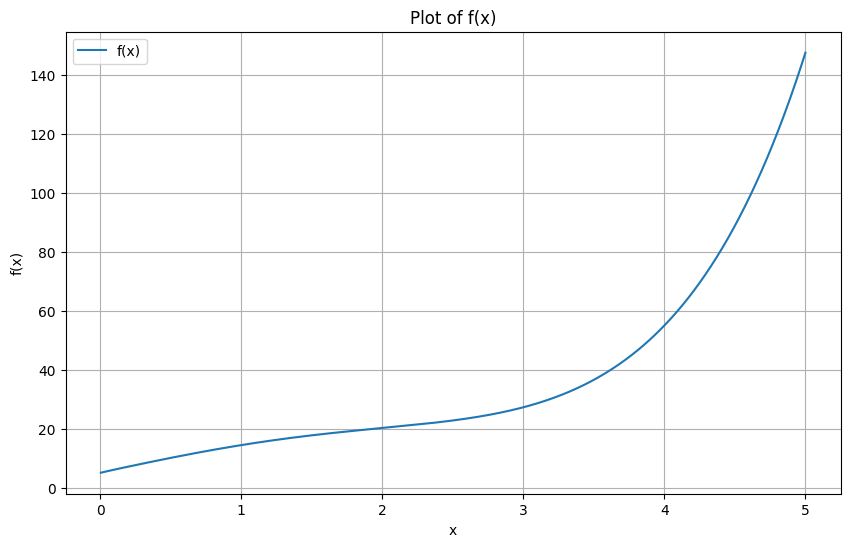

<ipython-input-1-7c7b133af748>:6: RuntimeWarning: invalid value encountered in double_scalars
  return np.exp(x) + 4 + x**(2/3) + 8 * np.sin(x)
<ipython-input-1-7c7b133af748>:47: RuntimeWarning: invalid value encountered in double_scalars
  return np.exp(x) + (2/3) * x**(-1/3) + 8 * np.cos(x)
<ipython-input-1-7c7b133af748>:47: RuntimeWarning: invalid value encountered in power
  return np.exp(x) + (2/3) * x**(-1/3) + 8 * np.cos(x)
/usr/local/lib/python3.10/dist-packages/matplotlib/collections.py:192: ComplexWarning: Casting complex values to real discards the imaginary part
  offsets = np.asanyarray(offsets, float)


Global Minimum: (-6.620916181583243+0.3572690575700561j)
Value of f(x) at Global Minimum: (-0.4742394439950868+5.872868918912342j)


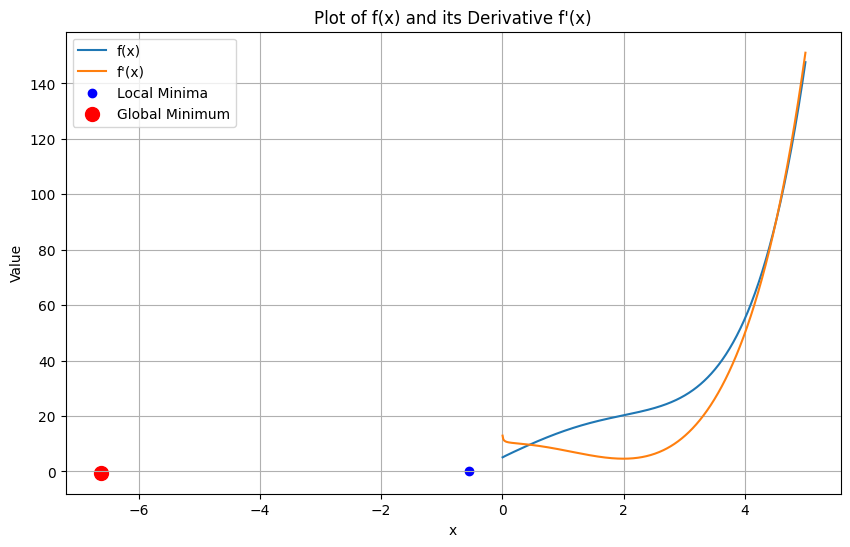

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Define the function f(x)
def f(x):
    return np.exp(x) + 4 + x**(2/3) + 8 * np.sin(x)

# Create an array of x values
x = np.linspace(-5, 5, 1000)  # Adjust the range as needed

# Calculate corresponding y values
y = f(x)

# Plot the function f(x)
plt.figure(figsize=(10, 6))
plt.plot(x, y, label='f(x)')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Plot of f(x)')
plt.grid(True)
plt.legend()
plt.show()

# Newton-Raphson method
def newton_raphson(f, f_prime, x0, epsilon=0.001, max_iterations=100):
    x = x0
    for i in range(max_iterations):
        f_x = f(x)
        f_prime_x = f_prime(x)

        if abs(f_prime_x) < epsilon:
            return x  # Avoid division by a very small number

        x_new = x - f_x / f_prime_x

        epsilon_abs = abs(x_new - x) / abs(x_new)

        if epsilon_abs < epsilon:
            return x_new

        x = x_new

    return x  # Return the current estimate if max_iterations is reached

# Define the first and second derivatives of f(x)
def f_prime(x):
    return np.exp(x) + (2/3) * x**(-1/3) + 8 * np.cos(x)

# Initialize variables to store minima points
local_minima = []
global_minima = []

# Perform Newton-Raphson for each initial value (excluding x=0)
initial_values = [-1.5, -0.5, 0.5, 1.5]  # Exclude 0

for x0 in initial_values:
    root = newton_raphson(f, f_prime, x0)

    # Calculate the second derivative at the root
    f_double_prime = np.exp(root) + (2/9) * root**(-4/3) - 8 * np.sin(root)

    # Check if it's a local minimum (second derivative is positive)
    if f_double_prime > 0:
        local_minima.append(root)

# Find the global minimum among local minima
global_minimum = min(local_minima, key=f)

# Print the global minimum
print("Global Minimum:", global_minimum)

# Evaluate the function at the global minimum
global_min_value = f(global_minimum)
print("Value of f(x) at Global Minimum:", global_min_value)

# Plot the function f(x) and its derivative f'(x)
plt.figure(figsize=(10, 6))
plt.plot(x, y, label='f(x)')
plt.plot(x, f_prime(x), label="f'(x)")
plt.scatter(local_minima, [f(x) for x in local_minima], c='blue', label='Local Minima')
plt.scatter(global_minimum, global_min_value, c='red', label='Global Minimum', marker='o', s=100)
plt.xlabel('x')
plt.ylabel('Value')
plt.title('Plot of f(x) and its Derivative f\'(x)')
plt.grid(True)
plt.legend()
plt.show()